## Mission Analytics Data Exercise

In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

- 1.0. Data Dictionary
- 2.0. Loading Data
- 3.0. Data Exploration
- 4.0. Data Cleansing - Males
    - 4.1. Removing Special Charecters
    - 4.2. Creating New Columns
    - 4.3. Updating Times for Gun/Net time and Pace
    - 4.4. Updating the State Column
    - 4.5. Updating Hometowns
    - 4.6. Changing Data Types
    - 4.7. Replacing empty spaces with NaN
- 5.0. Data Aanalysis - Males
    - 5.1. Identifying Null Values
    - 5.2. Descriptive Statistics
    - 5.3. Calculating Mean, Median and Mode
    - 5.4. Group Values - Males
- 6.0. Data Cleansing Females  
    - 6.1. Removing Special Charecters
    - 6.2. Creating New Columns
    - 6.3. Updating Times for Gun/Net time and Pace
    - 6.4. Updating State Column
    - 6.5. Updating Hometown Column
    - 6.6. Changing Data Types
    - 6.7. Replacing empty space with NaN
- 7.0. Data Analysis - females
    - 7.1. Identifying Null Values
    - 7.2. Descriptive Statistics
    - 7.3. Calculating Mean, Median and Mode
    - 7.4. Group Values - females

### 1.0. Data Dictionary

1. Place - The order in which each racer finished relative to racers of the same gender
2. Div/Tot - A division comprises racers of the same gender and age group* / The total number of racers within the same division
3. Num - Racer’s bib number
4. Name - Name of the racer
5. Ag - Age of the racer
6. Hometown - Hometown of the racer
7. Gun Tim - Elapsed time from the formal start of the race and when the racer crossed the finish line
8. Net Tim - Elapsed time from when the racer crossed the starting line and when the racer crossed the finish line
9. Pace - Racer’s average time per mile during this race

### 2.0. Loading Data

In [143]:
file_1 = "C:/Users/ushai/Downloads/MA Exercise_20180328-2/csv format/MA_Exer_PikesPeak_Males.csv"
file_2 = "C:/Users/ushai/Downloads/MA Exercise_20180328-2/csv format/MA_Exer_PikesPeak_Females.csv"

In [144]:
# Removing UnicodeDecodeError from file_2: 'utf-8' codec can't decode byte 0xeb in position 4: invalid continuation byte
import chardet
with open(file_1, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [145]:
# Variable m for males
# Variable f for females

male = pd.read_csv(file_1,encoding='ISO-8859-1')
female = pd.read_csv(file_2)

### 3.0. Data Exploration

In [146]:
# Setting option to view entire dataframe
pd.set_option('display.max_rows', None)

In [147]:
male.head()

Place Div/Tot  Num                Name    Ag      Hometown Gun Tim Net Tim  \
0      1    1/48    9        Joshua Kemei  22.0       Kenya .   28:48  28:47#   
1      2    2/48   35  George Kirwa Misoi  22.0       Kenya .   29:11  29:10#   
2      3    3/48    3          Jacob Frey  24.0     Oakton VA   29:38  29:37#   
3      4    1/96   49      Gurmessa Kumsa  27.0  Oxon Hill MD   29:46  29:46#   
4      5    4/48   31          Mike Baird  24.0    Ardmore PA   30:31   30:30   

         Pace  
0  4:38:00 AM  
1  4:42:00 AM  
2  4:46:00 AM  
3  4:48:00 AM  
4  4:55:00 AM

In [148]:
female.head()

Place Div/Tot   Num                Name    Ag         Hometown Gun Tim  \
0      1    1/86    30  Florence Jepkosgei  22.0          Kenya .   32:59   
1      2    2/86     8    Eunice Chepkirui  21.0          Kenya .   33:14   
2      3   1/247  3200        Elena Orlova  36.0  Gaithersburg MD   34:26   
3      4   1/173     2  Susannah Kvasnicka  34.0   Great Falls VA   34:43   
4      5   1/142     6         Casey Smith  26.0     Arlington VA   35:04   

  Net Tim        Pace  
0  32:58#  5:19:00 AM  
1  33:13#  5:21:00 AM  
2  34:25#  5:33:00 AM  
3  34:42#  5:35:00 AM  
4   35:02  5:39:00 AM

In [149]:
print('Males',male.shape)
print('Females',female.shape)

Males (1265, 9)
Females (1105, 9)


In [150]:
print("Males:")
male.info()

Males:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 9 columns):
Place       1265 non-null int64
Div/Tot     1263 non-null object
Num         1265 non-null int64
Name        1265 non-null object
Ag          1264 non-null float64
Hometown    1265 non-null object
Gun Tim     1265 non-null object
Net Tim     1265 non-null object
Pace        1265 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 89.0+ KB


In [151]:
print("Females:")
female.info()

Females:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 9 columns):
Place       1105 non-null int64
Div/Tot     1103 non-null object
Num         1105 non-null int64
Name        1105 non-null object
Ag          1104 non-null float64
Hometown    1105 non-null object
Gun Tim     1105 non-null object
Net Tim     1105 non-null object
Pace        1105 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 77.8+ KB


In [152]:
# Identifying Null values for males
print("Males:")
male.isnull().sum()

Males:


Place       0
Div/Tot     2
Num         0
Name        0
Ag          1
Hometown    0
Gun Tim     0
Net Tim     0
Pace        0
dtype: int64

In [153]:
# Identifying Null values for females
print("Females:")
female.isnull().sum()

Females:


Place       0
Div/Tot     2
Num         0
Name        0
Ag          1
Hometown    0
Gun Tim     0
Net Tim     0
Pace        0
dtype: int64

In [13]:
# Dropping null values for both dataframes

male = male.dropna().reset_index(drop = True)
female = female.dropna().reset_index(drop = True)

print('Males',male.shape)
print('Females',female.shape)

Males (1263, 9)
Females (1103, 9)


### 4.0. Data Cleansing - Males

### 4.1. Removing Special Charecters

In [14]:
# Convert float to integer for Age
male.Ag = male.Ag.astype(int)
male.Ag.dtype

dtype('int32')

In [15]:
# removing special character from Div/Tot
male.columns = male.columns.str.replace('[/]', '') 
male.columns

Index(['Place', 'DivTot', 'Num', 'Name', 'Ag', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace'],
      dtype='object')

In [16]:
# Removing special charecters from Net Time column
male['Net Tim'] = male['Net Tim'].str.replace('[#,@,&,/,*]', '')

In [17]:
# Removing D and A from Gun Tim
male['Gun Tim'] = male['Gun Tim'] .str.replace('["D", "A"]', '')

In [18]:
# Removing AM and PM from Pace
male.Pace = male.Pace.str.replace('["AM","PM"]', '') 

In [19]:
# Splitting DivTot and adding as two seperate columns
male[['Div','Tot']] = male['DivTot'].str.split("/", expand=True)

In [20]:
# Removing last two digits from Pace
male.Pace = male.Pace.str.slice(0,-4)

In [21]:
male.head()

Place DivTot  Num                Name  Ag      Hometown Gun Tim Net Tim  \
0      1   1/48    9        Joshua Kemei  22       Kenya .   28:48   28:47   
1      2   2/48   35  George Kirwa Misoi  22       Kenya .   29:11   29:10   
2      3   3/48    3          Jacob Frey  24     Oakton VA   29:38   29:37   
3      4   1/96   49      Gurmessa Kumsa  27  Oxon Hill MD   29:46   29:46   
4      5   4/48   31          Mike Baird  24    Ardmore PA   30:31   30:30   

   Pace Div Tot  
0  4:38   1  48  
1  4:42   2  48  
2  4:46   3  48  
3  4:48   1  96  
4  4:55   4  48

In [22]:
# Dropping DivTot after two seperate columns have been created
male.drop(['DivTot'], axis=1, inplace=True)

In [23]:
# Removing full stop from Hometown
male.Hometown = male.Hometown.str.replace('["."]', '')

In [24]:
# Renaming columns
male = male.rename(columns = {'Ag':'Age','Gun Tim':'Gun_time','Net Tim':'Net_time','Tot':'Total'})

In [25]:
# Changinig column sequence
male = male[['Place','Num','Div','Total','Name','Age','Hometown','Gun_time','Net_time','Pace']]

In [26]:
male.head()

Place  Num Div Total                Name  Age      Hometown Gun_time  \
0      1    9   1    48        Joshua Kemei   22        Kenya     28:48   
1      2   35   2    48  George Kirwa Misoi   22        Kenya     29:11   
2      3    3   3    48          Jacob Frey   24     Oakton VA    29:38   
3      4   49   1    96      Gurmessa Kumsa   27  Oxon Hill MD    29:46   
4      5   31   4    48          Mike Baird   24    Ardmore PA    30:31   

  Net_time  Pace  
0    28:47  4:38  
1    29:10  4:42  
2    29:37  4:46  
3    29:46  4:48  
4    30:30  4:55

### 4.2. Creating New Columns

In [27]:
# Adding a column for Sex
male['Sex'] = 'M'

In [28]:
# creating a new column with last two charecters for State
male['State'] = male['Hometown'].str[-2:]

In [29]:
# Removing State letters from Hometown
male.Hometown = male.Hometown.str.slice(0,-2)

In [30]:
# Replacing Keny with Kenya for Hometown
male.Hometown = male.Hometown.str.replace("Keny","Kenya", case=False)

In [31]:
# Replacing ya with INT for International
male.State = male.State.str.replace("ya"," ", case=False)

In [32]:
# Dropping negative ages for men
male.drop(male[male['Age'] < 0].index, inplace = True) 

In [33]:
# Seperating first, middle and last name.
# Middle name not included due to too many missing values

splitted_name = male.Name.str.split(expand=True)
male['First'] = splitted_name[0]
male['M']= np.where(splitted_name[2].notna(), splitted_name[1], '')
male['Last']= np.where(splitted_name[2].notna(), splitted_name[2], splitted_name[1])

In [34]:
# Updating column sequence
male_new = male[['Place','Name','Sex','Age','First','M','Last','Hometown','State','Num','Div','Total','Gun_time','Net_time','Pace']]

In [35]:
male_new

Place                   Name Sex  Age      First         M  \
0         1           Joshua Kemei   M   22     Joshua             
1         2     George Kirwa Misoi   M   22     George     Kirwa   
2         3             Jacob Frey   M   24      Jacob             
3         4         Gurmessa Kumsa   M   27   Gurmessa             
4         5             Mike Baird   M   24       Mike             
5         6             Jon Lauder   M   23        Jon             
6         7             Paul Rades   M   33       Paul             
7         8         Haile Gelalcha   M   20      Haile             
8         9             John Bitok   M   26       John             
9        10           Dema Woyessa   M   19       Dema             
10       11        Paris Caballero   M   23      Paris             
11       12          Troy Harrison   M   30       Troy             
12       13            Albert Haan   M   32     Albert             
13       14        Mike Colaiacovo   M   36       Mike             
14       15          Mark Malander   M   48       Mark             
15       16        Stavros Rologas   M   37    Stavros             
16       17               Nick Bax   M   15       Nick             
17       18              Alvin Yew   M   20      Alvin             
18       19            Jason Tripp   M   33      Jason             
19       20           Terry Permar   M   51      Terry             
20       21             David Mead   M   37      David             
21       22        Darrell General   M   40    Darrell             
22       23            David Haaga   M   44      David             
23       24       Andrew Cherviyot   M   34     Andrew             
24       25        George Buckheit   M   48     George             
25       26        David Bernstein   M   19      David             
26       27        Andrew Jacobson   M   28     Andrew             
27       28             Dan Lawson   M   50        Dan             
28       29           Cooper Linde   M   18     Cooper             
29       30           Neal Darmody   M   16       Neal             
30       31           Derik Thomas   M   40      Derik             
31       32       Stephen Majkrzak   M   26    Stephen             
32       33           Ronald Kulik   M   42     Ronald             
33       34             David Kent   M   34      David             
34       35            Sam Epstein   M   16        Sam             
35       36             Justin Ahn   M   20     Justin             
36       37     Sheldon Degenhardt   M   41    Sheldon             
37       38          Craig Shearer   M   25      Craig             
38       39          Steven Dowler   M   31     Steven             
39       40        William Bedford   M   23    William             
40       41            Ted Bradley   M   27        Ted             
41       42          Antonio Claro   M   44    Antonio             
42       43             Alex Hooke   M   22       Alex             
43       44            Marty Horan   M   46      Marty             
44       45           Stephen Hays   M   38    Stephen             
45       46         Christoph Dean   M   31  Christoph             
46       47        Thomas Faucette   M   29     Thomas             
47       48        John O Thornton   M   17       John         O   
48       49          Paul Longoria   M   20       Paul             
49       50          Paul Jacobson   M   43       Paul             
50       51         Dennis Coleman   M   48     Dennis             
51       52          Aaron Macgray   M   21      Aaron             
52       53               Leyi Lin   M   26       Leyi             
53       54       Artem Panasenkov   M   16      Artem             
54       55          Peter Darmody   M   50      Peter             
55       56            Ronald Hess   M   44     Ronald             
56       57             Kevin Kemp   M   27      Kevin             
57       58             John Chall   M   48       John        

### 4.3. Updating Times for Gun/Net time and Pace

In [36]:
# Sorting values by 'Pace'
male_new = male_new.sort_values('Pace').reset_index(drop=True)

In [37]:
# Adjusting times for 'Pace'
male_new.iloc[:148,-1:] = '00:' + male_new['Pace'].astype(str) #....Will cover rows till 147
male_new.iloc[148:,-1:] = '00:0' + male_new['Pace'].astype(str) #....Will cover rows from 148 till end

In [38]:
# Sorting values by 'Pace'
male_new = male_new.sort_values('Net_time').reset_index(drop=True)

In [39]:
# Adjusting 'Net_time'
male_new.iloc[:200,[-2]] = '0' + male_new['Net_time'].astype(str) #....Will cover rows till 200 in second last column

In [40]:
male_new.iloc[200:,[-2]] = '00:' + male_new['Net_time'].astype(str) #....Will cover rows from 200 till the end

In [41]:
# Sorting values for 'Gun_time'
male_new = male_new.sort_values('Gun_time').reset_index(drop=True)

In [42]:
# Additions made by sorting 'Gun_time' and resetting index .reset_index(drop=true)
male_new.iloc[:368,[-3]] = '0' + male_new['Gun_time'].astype(str) #....Will cover rows till 368 in third last column
male_new.iloc[368:,[-3]] = '00:' + male_new['Gun_time'].astype(str) #....Will cover rows from 368 till the end

In [43]:
# Sorting values by 'Place'
male_new = male_new.sort_values('Place').reset_index(drop=True)

In [44]:
male_new

Place                   Name Sex  Age      First         M  \
0         1           Joshua Kemei   M   22     Joshua             
1         2     George Kirwa Misoi   M   22     George     Kirwa   
2         3             Jacob Frey   M   24      Jacob             
3         4         Gurmessa Kumsa   M   27   Gurmessa             
4         5             Mike Baird   M   24       Mike             
5         6             Jon Lauder   M   23        Jon             
6         7             Paul Rades   M   33       Paul             
7         8         Haile Gelalcha   M   20      Haile             
8         9             John Bitok   M   26       John             
9        10           Dema Woyessa   M   19       Dema             
10       11        Paris Caballero   M   23      Paris             
11       12          Troy Harrison   M   30       Troy             
12       13            Albert Haan   M   32     Albert             
13       14        Mike Colaiacovo   M   36       Mike             
14       15          Mark Malander   M   48       Mark             
15       16        Stavros Rologas   M   37    Stavros             
16       17               Nick Bax   M   15       Nick             
17       18              Alvin Yew   M   20      Alvin             
18       19            Jason Tripp   M   33      Jason             
19       20           Terry Permar   M   51      Terry             
20       21             David Mead   M   37      David             
21       22        Darrell General   M   40    Darrell             
22       23            David Haaga   M   44      David             
23       24       Andrew Cherviyot   M   34     Andrew             
24       25        George Buckheit   M   48     George             
25       26        David Bernstein   M   19      David             
26       27        Andrew Jacobson   M   28     Andrew             
27       28             Dan Lawson   M   50        Dan             
28       29           Cooper Linde   M   18     Cooper             
29       30           Neal Darmody   M   16       Neal             
30       31           Derik Thomas   M   40      Derik             
31       32       Stephen Majkrzak   M   26    Stephen             
32       33           Ronald Kulik   M   42     Ronald             
33       34             David Kent   M   34      David             
34       35            Sam Epstein   M   16        Sam             
35       36             Justin Ahn   M   20     Justin             
36       37     Sheldon Degenhardt   M   41    Sheldon             
37       38          Craig Shearer   M   25      Craig             
38       39          Steven Dowler   M   31     Steven             
39       40        William Bedford   M   23    William             
40       41            Ted Bradley   M   27        Ted             
41       42          Antonio Claro   M   44    Antonio             
42       43             Alex Hooke   M   22       Alex             
43       44            Marty Horan   M   46      Marty             
44       45           Stephen Hays   M   38    Stephen             
45       46         Christoph Dean   M   31  Christoph             
46       47        Thomas Faucette   M   29     Thomas             
47       48        John O Thornton   M   17       John         O   
48       49          Paul Longoria   M   20       Paul             
49       50          Paul Jacobson   M   43       Paul             
50       51         Dennis Coleman   M   48     Dennis             
51       52          Aaron Macgray   M   21      Aaron             
52       53               Leyi Lin   M   26       Leyi             
53       54       Artem Panasenkov   M   16      Artem             
54       55          Peter Darmody   M   50      Peter             
55       56            Ronald Hess   M   44     Ronald             
56       57             Kevin Kemp   M   27      Kevin             
57       58             John Chall   M   48       John        

### 4.4. Updating the State Column

In [45]:
male_new['State'].value_counts()

MD    1061
VA     100
DC      50
ll      15
 M       6
PA       6
         6
a        3
NJ       2
on       2
MS       1
 F       1
IA       1
IL       1
CT       1
 V       1
rk       1
ov       1
WA       1
MA       1
Name: State, dtype: int64

In [46]:
# Identifying abnormal entries for State
male_new[(male_new.State == 'll') | (male_new.State == ' M') | (male_new.State == 'a ') |\
        (male_new.State == 'on') | (male_new.State == 'ov') | (male_new.State == 'rk')|\
        (male_new.State == ' F') | (male_new.State == ' V')]

Place                Name Sex  Age    First      M        Last  \
0         1        Joshua Kemei   M   22   Joshua              Kemei   
1         2  George Kirwa Misoi   M   22   George  Kirwa       Misoi   
8         9          John Bitok   M   26     John              Bitok   
36       37  Sheldon Degenhardt   M   41  Sheldon         Degenhardt   
44       45        Stephen Hays   M   38  Stephen               Hays   
62       63     Rafael Guijarro   M   45   Rafael           Guijarro   
103     104         Fred Turner   M   35     Fred             Turner   
128     129        Ralph Lennon   M   45    Ralph             Lennon   
134     135        Sean Eastman   M   37     Sean            Eastman   
160     161            John Way   M   40     John                Way   
167     168        John Forrest   M   25     John            Forrest   
238     239        Walter Brown   M   62   Walter              Brown   
265     266           David Jeo   M   44    David                Jeo   
286     287          James Snee   M   45    James               Snee   
328     329          Jason Zorn   M   34    Jason               Zorn   
412     413         Michael Ray   M   42  Michael                Ray   
441     442         David Blass   M   52    David              Blass   
448     449     Michael Decrick   M   42  Michael            Decrick   
489     490          Gene Beard   M   41     Gene              Beard   
583     585         John Cahill   M   54     John             Cahill   
620     622       William Britz   M   54  William              Britz   
621     623         Paul Meloan   M   38     Paul             Meloan   
764     767         Mike Lorete   M   26     Mike             Lorete   
862     866       Robert Palmer   M   53   Robert             Palmer   
882     886         John Morris   M   58     John             Morris   
907     911       Max Billinger   M   62      Max          Billinger   
974     978      Michael Riegel   M   35  Michael             Riegel   
1001   1005         John Horton   M   44     John             Horton   
1121   1125   Dennis Kirschbaum   M   44   Dennis         Kirschbaum   
1215   1220        Robert Noyes   M   58   Robert              Noyes   

            Hometown State   Num  Div Total  Gun_time  Net_time      Pace  
0              Kenya    a      9    1    48  00:28:48  00:28:47  00:04:38  
1              Kenya    a     35    2    48  00:29:11  00:29:10  00:04:42  
8              Kenya    a     33    2    96  00:31:55  00:31:55  00:05:09  
36    Marriottsville     V   922    5   214  00:35:31  00:35:28  00:05:43  
44     University Pa    rk  1354    4   203  00:35:48  00:35:46  00:05:46  
62    Pembroke Pines     F  1293    7   201  00:37:30  00:37:28  00:06:02  
103    Montgomery Vi    ll  2667   12   203  00:39:55  00:39:52  00:06:25  
128    Montgomery Vi    ll  1699   20   201  00:41:19  00:41:16  00:06:39  
134    Montgomery Vi    ll  1018   21   203  00:41:29  00:41:26  00:06:40  
160    Montgomery Vi    ll  3253   28   214  00:43:17  00:42:14  00:06:48  
167   North Bethesda     M  1131   19    96  00:43:51  00:42:27  00:06:50  
238    Montgomery Vi    ll   685    3    50  00:44:11  00:44:06  00:07:06  
265    Montgomery Vi    ll  1475   52   214  00:45:54  00:44:41  00:07:12  
286    Montgomery Vi    ll  2499   46   201  00:46:03  00:44:59  00:07:15  
328   North Bethesda     M  2860   42   143  00:49:13  00:45:54  00:07:24  
412    Fairfax Stati    on  2242   78   214  00:49:09  00:47:32  00:07:39  
441   North Bethesda     M   615   35   132  00:51:13  00:48:08  00:07:45  
448    Montgomery Vi    ll   921   89   214  00:51:42  00:48:16  00:07:47  
489    Montgomery Vi    ll   572   98   214  00:52:39  00:49:01  00:07:54  
583   North Bethesda     M   716   58   132  00:54:01  00:50:35  00:08:09  
620    Montgomery Vi    ll   671   64   132  00:55:19  00:51:17  00:08:16  
621    Montgomery Vi    ll  1909   97   203  00:54:47  00:51:17  00:08:16  
764    Montgomery Vi    l

### 4.5. Updating Hometowns

In [47]:
# Name correction for Hometown
male_new.Hometown = male_new.Hometown.str.replace("University Pa","University Park")\
.replace("Montgomery Vi","Montgomery Vill").replace("Washington Gr","Washington Grov")\
.replace("Fairfax Stati","Fairfax Station")

In [48]:
# Name correction for State
# North Bethesda and Pembroke Pines have been assigned to MD and FL respectively
# State unknown for 'Montgomery Vill' and 'Washington Grov'

male_new.State = male_new.State.str.replace('a ','').replace('rk','MD').replace(' V','MD').replace('ll','')\
.replace('ov','').replace(' F','FL').replace('on','VA').replace(' M','MD')

In [49]:
# Creating a csv file 
male_new.to_csv('male_new.csv', index=False)

### 4.6. Changing Data Types

In [50]:
# Changing dtypes to integers.
Integers = ['Age','Num','Div', 'Total']
for column in Integers:
    male_new[Integers] = male_new[Integers].astype(int)

In [51]:
# Changing dtypes for time columns to time delta
for col in ("Gun_time", "Net_time", "Pace"):
    male_new[col] = pd.to_timedelta(male_new[col])

In [52]:
# Updated dtypes
male_new.dtypes

Place                 int64
Name                 object
Sex                  object
Age                   int32
First                object
M                    object
Last                 object
Hometown             object
State                object
Num                   int32
Div                   int32
Total                 int32
Gun_time    timedelta64[ns]
Net_time    timedelta64[ns]
Pace        timedelta64[ns]
dtype: object

In [53]:
# Adding a column for the difference of 'Gun_time' Vs. 'Net_time'.
male_new['Difference'] = male_new['Gun_time'] - male_new['Net_time']

In [54]:
male_new

Place                   Name Sex  Age      First         M  \
0         1           Joshua Kemei   M   22     Joshua             
1         2     George Kirwa Misoi   M   22     George     Kirwa   
2         3             Jacob Frey   M   24      Jacob             
3         4         Gurmessa Kumsa   M   27   Gurmessa             
4         5             Mike Baird   M   24       Mike             
5         6             Jon Lauder   M   23        Jon             
6         7             Paul Rades   M   33       Paul             
7         8         Haile Gelalcha   M   20      Haile             
8         9             John Bitok   M   26       John             
9        10           Dema Woyessa   M   19       Dema             
10       11        Paris Caballero   M   23      Paris             
11       12          Troy Harrison   M   30       Troy             
12       13            Albert Haan   M   32     Albert             
13       14        Mike Colaiacovo   M   36       Mike             
14       15          Mark Malander   M   48       Mark             
15       16        Stavros Rologas   M   37    Stavros             
16       17               Nick Bax   M   15       Nick             
17       18              Alvin Yew   M   20      Alvin             
18       19            Jason Tripp   M   33      Jason             
19       20           Terry Permar   M   51      Terry             
20       21             David Mead   M   37      David             
21       22        Darrell General   M   40    Darrell             
22       23            David Haaga   M   44      David             
23       24       Andrew Cherviyot   M   34     Andrew             
24       25        George Buckheit   M   48     George             
25       26        David Bernstein   M   19      David             
26       27        Andrew Jacobson   M   28     Andrew             
27       28             Dan Lawson   M   50        Dan             
28       29           Cooper Linde   M   18     Cooper             
29       30           Neal Darmody   M   16       Neal             
30       31           Derik Thomas   M   40      Derik             
31       32       Stephen Majkrzak   M   26    Stephen             
32       33           Ronald Kulik   M   42     Ronald             
33       34             David Kent   M   34      David             
34       35            Sam Epstein   M   16        Sam             
35       36             Justin Ahn   M   20     Justin             
36       37     Sheldon Degenhardt   M   41    Sheldon             
37       38          Craig Shearer   M   25      Craig             
38       39          Steven Dowler   M   31     Steven             
39       40        William Bedford   M   23    William             
40       41            Ted Bradley   M   27        Ted             
41       42          Antonio Claro   M   44    Antonio             
42       43             Alex Hooke   M   22       Alex             
43       44            Marty Horan   M   46      Marty             
44       45           Stephen Hays   M   38    Stephen             
45       46         Christoph Dean   M   31  Christoph             
46       47        Thomas Faucette   M   29     Thomas             
47       48        John O Thornton   M   17       John         O   
48       49          Paul Longoria   M   20       Paul             
49       50          Paul Jacobson   M   43       Paul             
50       51         Dennis Coleman   M   48     Dennis             
51       52          Aaron Macgray   M   21      Aaron             
52       53               Leyi Lin   M   26       Leyi             
53       54       Artem Panasenkov   M   16      Artem             
54       55          Peter Darmody   M   50      Peter             
55       56            Ronald Hess   M   44     Ronald             
56       57             Kevin Kemp   M   27      Kevin             
57       58             John Chall   M   48       John        

### 4.7. Replacing empty spaces with NaN

In [55]:
# Counting unique values
male_new['State'].value_counts()

MD    1069
VA     102
DC      50
        25
PA       6
NJ       2
FL       1
MS       1
IA       1
MA       1
IL       1
CT       1
WA       1
Name: State, dtype: int64

In [56]:
# Identifying empty spaces
male_new[(male_new.State == '')] 

Place                Name Sex  Age    First      M        Last  \
0         1        Joshua Kemei   M   22   Joshua              Kemei   
1         2  George Kirwa Misoi   M   22   George  Kirwa       Misoi   
8         9          John Bitok   M   26     John              Bitok   
58       59       Jack Morrison   M   46     Jack           Morrison   
81       82          Bill Stahr   M   45     Bill              Stahr   
103     104         Fred Turner   M   35     Fred             Turner   
128     129        Ralph Lennon   M   45    Ralph             Lennon   
134     135        Sean Eastman   M   37     Sean            Eastman   
160     161            John Way   M   40     John                Way   
175     176         Doug Baruch   M   44     Doug             Baruch   
238     239        Walter Brown   M   62   Walter              Brown   
265     266           David Jeo   M   44    David                Jeo   
286     287          James Snee   M   45    James               Snee   
448     449     Michael Decrick   M   42  Michael            Decrick   
468     469       Michael Eisen   M   45  Michael              Eisen   
489     490          Gene Beard   M   41     Gene              Beard   
620     622       William Britz   M   54  William              Britz   
621     623         Paul Meloan   M   38     Paul             Meloan   
649     651       Jim Delorenzo   M   37      Jim          Delorenzo   
764     767         Mike Lorete   M   26     Mike             Lorete   
907     911       Max Billinger   M   62      Max          Billinger   
974     978      Michael Riegel   M   35  Michael             Riegel   
1001   1005         John Horton   M   44     John             Horton   
1121   1125   Dennis Kirschbaum   M   44   Dennis         Kirschbaum   
1217   1222         Cary Klimen   M   65     Cary             Klimen   

             Hometown State   Num  Div  Total Gun_time Net_time     Pace  \
0               Kenya           9    1     48 00:28:48 00:28:47 00:04:38   
1               Kenya          35    2     48 00:29:11 00:29:10 00:04:42   
8               Kenya          33    2     96 00:31:55 00:31:55 00:05:09   
58                           3292    6    201 00:37:14 00:37:10 00:05:59   
81                           2985   11    201 00:38:25 00:38:22 00:06:11   
103   Montgomery Vill        2667   12    203 00:39:55 00:39:52 00:06:25   
128   Montgomery Vill        1699   20    201 00:41:19 00:41:16 00:06:39   
134   Montgomery Vill        1018   21    203 00:41:29 00:41:26 00:06:40   
160   Montgomery Vill        3253   28    214 00:43:17 00:42:14 00:06:48   
175                          3356   29    214 00:43:38 00:42:37 00:06:52   
238   Montgomery Vill         685    3     50 00:44:11 00:44:06 00:07:06   
265   Montgomery Vill        1475   52    214 00:45:54 00:44:41 00:07:12   
286   Montgomery Vill        2499   46    201 00:46:03 00:44:59 00:07:15   
448   Montgomery Vill         921   89    214 00:51:42 00:48:16 00:07:47   
468                          3265   73    201 00:48:48 00:48:42 00:07:51   
489   Montgomery Vill         572   98    214 00:52:39 00:49:01 00:07:54   
620   Montgomery Vill         671   64    132 00:55:19 00:51:17 00:08:16   
621   Montgomery Vill        1909   97    203 00:54:47 00:51:17 00:08:16   
649                          3016  102    203 00:55:33 00:51:37 00:08:19   
764   Montgomery Vill        1750   59     96 00:57:32 00:53:43 00:08:39   
907   Montgomery Vill         605   27     50 01:00:06 00:57:00 00:09:11   
974   Montgomery Vill        2276  157    203 01:01:48 00:58:15 00:09:23   
1001  Montgomery Vill        1404  184    214 01:02:49 00:58:43 00:09:27   
1121  Washington Grov        1585  199    214 01:08:48 01:03:28 00:10:13   
1217                         3355   17     19 01:11:58 01:11:54 00:11:35   

     Difference  
0      00:00:01  
1      00:00:01  
8      00:00:00  
58     00:00:04  
81     00:00:03  
103    00:00:03  
128    00:00:03  
134    00:00

In [57]:
# Converting empty spaces to 'NaN'
male_new = male_new.replace(r'^\s*$', np.nan, regex=True)

In [58]:
# Counting all Null values
male_new.isnull().sum()

Place            0
Name             0
Sex              0
Age              0
First            0
M             1238
Last             0
Hometown         6
State           25
Num              0
Div              0
Total            0
Gun_time         0
Net_time         0
Pace             0
Difference       0
dtype: int64

In [59]:
male_new

Place                   Name Sex  Age      First         M  \
0         1           Joshua Kemei   M   22     Joshua       NaN   
1         2     George Kirwa Misoi   M   22     George     Kirwa   
2         3             Jacob Frey   M   24      Jacob       NaN   
3         4         Gurmessa Kumsa   M   27   Gurmessa       NaN   
4         5             Mike Baird   M   24       Mike       NaN   
5         6             Jon Lauder   M   23        Jon       NaN   
6         7             Paul Rades   M   33       Paul       NaN   
7         8         Haile Gelalcha   M   20      Haile       NaN   
8         9             John Bitok   M   26       John       NaN   
9        10           Dema Woyessa   M   19       Dema       NaN   
10       11        Paris Caballero   M   23      Paris       NaN   
11       12          Troy Harrison   M   30       Troy       NaN   
12       13            Albert Haan   M   32     Albert       NaN   
13       14        Mike Colaiacovo   M   36       Mike       NaN   
14       15          Mark Malander   M   48       Mark       NaN   
15       16        Stavros Rologas   M   37    Stavros       NaN   
16       17               Nick Bax   M   15       Nick       NaN   
17       18              Alvin Yew   M   20      Alvin       NaN   
18       19            Jason Tripp   M   33      Jason       NaN   
19       20           Terry Permar   M   51      Terry       NaN   
20       21             David Mead   M   37      David       NaN   
21       22        Darrell General   M   40    Darrell       NaN   
22       23            David Haaga   M   44      David       NaN   
23       24       Andrew Cherviyot   M   34     Andrew       NaN   
24       25        George Buckheit   M   48     George       NaN   
25       26        David Bernstein   M   19      David       NaN   
26       27        Andrew Jacobson   M   28     Andrew       NaN   
27       28             Dan Lawson   M   50        Dan       NaN   
28       29           Cooper Linde   M   18     Cooper       NaN   
29       30           Neal Darmody   M   16       Neal       NaN   
30       31           Derik Thomas   M   40      Derik       NaN   
31       32       Stephen Majkrzak   M   26    Stephen       NaN   
32       33           Ronald Kulik   M   42     Ronald       NaN   
33       34             David Kent   M   34      David       NaN   
34       35            Sam Epstein   M   16        Sam       NaN   
35       36             Justin Ahn   M   20     Justin       NaN   
36       37     Sheldon Degenhardt   M   41    Sheldon       NaN   
37       38          Craig Shearer   M   25      Craig       NaN   
38       39          Steven Dowler   M   31     Steven       NaN   
39       40        William Bedford   M   23    William       NaN   
40       41            Ted Bradley   M   27        Ted       NaN   
41       42          Antonio Claro   M   44    Antonio       NaN   
42       43             Alex Hooke   M   22       Alex       NaN   
43       44            Marty Horan   M   46      Marty       NaN   
44       45           Stephen Hays   M   38    Stephen       NaN   
45       46         Christoph Dean   M   31  Christoph       NaN   
46       47        Thomas Faucette   M   29     Thomas       NaN   
47       48        John O Thornton   M   17       John         O   
48       49          Paul Longoria   M   20       Paul       NaN   
49       50          Paul Jacobson   M   43       Paul       NaN   
50       51         Dennis Coleman   M   48     Dennis       NaN   
51       52          Aaron Macgray   M   21      Aaron       NaN   
52       53               Leyi Lin   M   26       Leyi       NaN   
53       54       Artem Panasenkov   M   16      Artem       NaN   
54       55          Peter Darmody   M   50      Peter       NaN   
55       56            Ronald Hess   M   44     Ronald       NaN   
56       57             Kevin Kemp   M   27      Kevin       NaN   
57       58             John Chall   M   48       John       N

### 5.0. Data Analysis - Males

In [60]:
# General Information
male_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 16 columns):
Place         1261 non-null int64
Name          1261 non-null object
Sex           1261 non-null object
Age           1261 non-null int64
First         1261 non-null object
M             23 non-null object
Last          1261 non-null object
Hometown      1255 non-null object
State         1236 non-null object
Num           1261 non-null int64
Div           1261 non-null int64
Total         1261 non-null int64
Gun_time      1261 non-null timedelta64[ns]
Net_time      1261 non-null timedelta64[ns]
Pace          1261 non-null timedelta64[ns]
Difference    1261 non-null timedelta64[ns]
dtypes: int64(5), object(7), timedelta64[ns](4)
memory usage: 157.7+ KB


In [61]:
# Data Shape
male_new.shape

(1261, 16)

### 5.1. Identifying Null Values

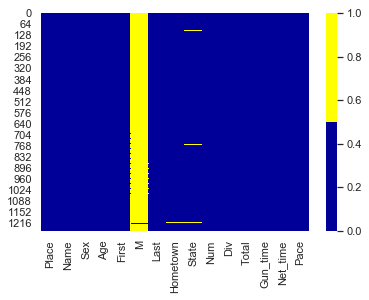

In [62]:
# Identifying Null values using heatmap
cols = male_new.columns[:15] # first 15 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(male_new[cols].isnull(), cmap=sns.color_palette(colours))

# Majority of the Null values are in Middle name column along with few among Hometown and State

### 5.2. Descriptive Statistics

In [63]:
male_new.describe()

Place          Age          Num          Div        Total  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean    632.428232    40.819191  1705.466297    74.951626   148.922284   
std     365.487004    12.259456   922.800782    56.736288    64.069942   
min       1.000000     9.000000     3.000000     1.000000     2.000000   
25%     316.000000    33.000000   955.000000    27.000000    96.000000   
50%     632.000000    41.000000  1709.000000    62.000000   143.000000   
75%     949.000000    49.000000  2466.000000   116.000000   203.000000   
max    1265.000000    84.000000  3356.000000   214.000000   214.000000   

                     Gun_time                Net_time                    Pace  \
count                    1261                    1261                    1261   
mean   0 days 00:54:37.144329  0 days 00:52:07.066613  0 days 00:08:16.795400   
std    0 days 00:10:51.238543  0 days 00:09:41.319416  0 days 00:01:33.045479   
min           0 days 00:28:48         0 days 00:28:47         0 days 00:01:08   
25%           0 days 00:47:00         0 days 00:45:41         0 days 00:07:19   
50%           0 days 00:54:18         0 days 00:51:22         0 days 00:08:15   
75%           0 days 01:01:07         0 days 00:57:49         0 days 00:09:15   
max           0 days 01:44:07         0 days 01:40:38         0 days 00:12:57   

                   Difference  
count                    1261  
mean   0 days 00:02:30.077716  
std    0 days 00:01:35.319148  
min           0 days 00:00:00  
25%           0 days 00:01:09  
50%           0 days 00:03:05  
75%           0 days 00:03:40  
max           0 days 00:07:49

### 5.3. Calculating Mean, Median and Mode

In [64]:
print('Mean Age for Males:', male_new['Age'].mean())
print('Median Age for Males:', male_new['Age'].median())
print('Mode for Age in Males', male_new['Age'].mode())

Mean Age for Males: 40.81919111816019
Median Age for Males: 41.0
Mode for Age in Males 0    44
dtype: int64


In [65]:
print('Mean Net_time for Males:', male_new['Net_time'].mean())
print('Median Net_time for Males:', male_new['Net_time'].median())
print('Mode for Net_time in Males', male_new['Net_time'].mode())

Mean Net_time for Males: 0 days 00:52:07.066613
Median Net_time for Males: 0 days 00:51:22
Mode for Net_time in Males 0   00:35:28
1   00:47:05
2   00:47:23
3   00:49:48
4   00:49:58
5   00:51:20
6   00:52:06
7   00:52:42
8   00:54:24
9   00:56:43
dtype: timedelta64[ns]


In [66]:
print('Mean Pace for Males:', male_new['Pace'].mean())
print('Median Pace for Males:', male_new['Pace'].median())
print('Mode for pace in Males', male_new['Pace'].mode())

Mean Pace for Males: 0 days 00:08:16.795400
Median Pace for Males: 0 days 00:08:15
Mode for pace in Males 0   00:07:15
1   00:08:03
2   00:08:40
3   00:09:20
dtype: timedelta64[ns]


In [67]:
print('Mean Gun_time for Males:', male_new['Gun_time'].mean())
print('Median Gun_time for Males:', male_new['Gun_time'].median())
print('Mode for Gun_time in Males', male_new['Gun_time'].mode())

Mean Gun_time for Males: 0 days 00:54:37.144329
Median Gun_time for Males: 0 days 00:54:18
Mode for Gun_time in Males 0   00:55:13
1   01:04:56
dtype: timedelta64[ns]


### 5.4. Group Values - Males

In [68]:
# Analyzing number of runners by state
male_new.groupby(["State"])[["Name"]].count()

Name
State      
CT        1
DC       50
FL        1
IA        1
IL        1
MA        1
MD     1069
MS        1
NJ        2
PA        6
VA      102
WA        1

In [69]:
# Grouped by Age analyzing 'Division'
male_new.groupby(["Age"])[["Div"]].describe()

Div                                                           
    count        mean        std   min     25%    50%     75%    max
Age                                                                 
9     1.0   28.000000        NaN  28.0   28.00   28.0   28.00   28.0
10    1.0   24.000000        NaN  24.0   24.00   24.0   24.00   24.0
11    1.0   11.000000        NaN  11.0   11.00   11.0   11.00   11.0
12    6.0   14.500000   6.473021   3.0   13.25   15.5   17.75   22.0
13   10.0   16.600000   8.342661   2.0   10.50   19.5   22.50   27.0
14    7.0    7.000000   4.760952   1.0    4.50    6.0    8.50   16.0
15   11.0   23.818182  14.844650   2.0   13.00   21.0   37.50   45.0
16   15.0   23.333333  12.630274   5.0   14.00   23.0   33.50   43.0
17    9.0   28.111111  11.274356   7.0   20.00   30.0   37.00   42.0
18    4.0   19.250000  15.305228   4.0    8.50   17.5   28.25   38.0
19    6.0   15.500000  12.613485   1.0    4.50   16.5   26.25   29.0
20    6.0   18.666667  15.513435   6.0    8.25   10.5   30.75   40.0
21    8.0   27.750000  12.713884  13.0   17.75   25.5   38.75   46.0
22    7.0   15.571429  12.259107   1.0    6.50   15.0   24.00   32.0
23    9.0   22.000000  13.901439   5.0   10.00   20.0   35.00   42.0
24   18.0   29.722222  13.362835   3.0   24.25   29.5   41.25   48.0
25   13.0   38.846154  24.711152   5.0   19.00   33.0   48.00   90.0
26   22.0   43.500000  28.196167   2.0   16.25   46.5   61.50   94.0
27   20.0   48.300000  31.435983   1.0   21.25   50.0   74.25   96.0
28   21.0   50.238095  24.271186   3.0   34.00   49.0   69.00   89.0
29   20.0   58.650000  28.333122   7.0   35.50   64.5   83.00   95.0
30   21.0   65.666667  42.483330   2.0   33.00   53.0  101.00  140.0
31   29.0   78.310345  44.752577   7.0   37.00   85.0  120.00  142.0
32   28.0   82.821429  38.442890   3.0   57.50   84.5  112.50  137.0
33   31.0   67.580645  41.204995   1.0   31.50   66.0   93.00  139.0
34   34.0   65.647059  40.228802   5.0   30.25   66.5  101.00  143.0
35   38.0  105.026316  57.904155   5.0   62.75  107.0  157.75  201.0
36   53.0   93.698113  52.865426   1.0   49.00   91.0  135.00  191.0
37   43.0   90.837209  63.925898   2.0   30.00   86.0  139.50  203.0
38   34.0   90.676471  57.699178   4.0   34.25   91.0  129.00  199.0
39   35.0  136.000000  52.029969  19.0  106.50  146.0  178.00  202.0
40   49.0  107.530612  67.409848   1.0   49.00  101.0  173.00  214.0
41   42.0  104.380952  61.718856   5.0   54.75  101.0  149.75  213.0
42   35.0  109.000000  60.268029   4.0   68.50  111.0  159.50  204.0
43   34.0  120.411765  58.231054   7.0   72.25  131.0  164.50  206.0
44   54.0  100.796296  61.184342   2.0   48.25   95.0  147.25  210.0
45   46.0   90.543478  58.963909   7.0   40.50   76.5  146.00  201.0
46   43.0   93.116279  61.599787   3.0   38.50   86.0  147.00  192.0
47   35.0  127.714286  50.654290  14.0   93.50  132.0  166.50  198.0
48   43.0   87.395349  56.090123   1.0   36.50   98.0  125.50  199.0
49   34.0  114.823529  53.474701  23.0   74.25  106.5  169.75  200.0
50   28.0   52.964286  41.541128   2.0   16.50   45.5   80.75  130.0
51   29.0   64.310345  44.137046   1.0   23.00   57.0  110.00  132.0
52   29.0   71.827586  35.282603  14.0   40.00   70.0  100.00  129.0
53   28.0   76.392857  32.927911  11.0   45.75   81.5  102.75  123.0
54   18.0   67.111111  32.124553   4.0   55.00   65.5   88.75  124.0
55   16.0   28.687500  21.971857   1.0   10.50   27.0   44.25   70.0
56   17.0   38.000000  21.868928   3.0   23.00   35.0   56.00   72.0
57   10.0   43.000000  21.944374  10.0   27.00   47.5   58.00   73.0
58   18.0   43.833333  19.162617   6.0   35.00   41.5   60.25   71.0
59   12.0   31.416667  19.644376   5.0   18.00   27.0   48.50   62.0
60    9.0   20.666667  14.343988   5.0    7.00   21.0   32.00   43.0
61    5.0   23.800000  15.738488   1.0   15.00   29.0   34.00   40.0
62   14.0   27.714286  16.264301   2.0   17.00   26.5   44.75   48.0
63   14.0   24.000000  15.079278   4.0   13.25   18.5   34.50   50.0
64  

### 6.0. Data Cleansing - Females

### 6.1. Removing Special Charecters

In [70]:
# Convert float to integer for Age
female.Ag = female.Ag.astype(int)
female.Ag.dtype

dtype('int32')

In [71]:
# removing special character from Div/Tot
female.columns = female.columns.str.replace('[/]', '') 
female.columns

Index(['Place', 'DivTot', 'Num', 'Name', 'Ag', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace'],
      dtype='object')

In [72]:
# Removing special charecters from Net Time column
female['Net Tim'] = female['Net Tim'].str.replace('[#,@,&,/,*]', '')

In [73]:
# Removing D and A from Gun Tim
female['Gun Tim'] = female['Gun Tim'] .str.replace('["D", "A","M","N","V"]', '')

In [74]:
# Removing AM and PM from Pace
female.Pace = female.Pace.str.replace('["AM","PM"]', '') 

In [75]:
# Splitting DivTot and adding as two seperate columns
female[['Div','Tot']] = female['DivTot'].str.split("/", expand=True)

In [76]:
# Removing last two digits from Pace
female.Pace = female.Pace.str.slice(0,-4)

In [77]:
female.head()

Place DivTot   Num                Name  Ag         Hometown Gun Tim  \
0      1   1/86    30  Florence Jepkosgei  22          Kenya .   32:59   
1      2   2/86     8    Eunice Chepkirui  21          Kenya .   33:14   
2      3  1/247  3200        Elena Orlova  36  Gaithersburg MD   34:26   
3      4  1/173     2  Susannah Kvasnicka  34   Great Falls VA   34:43   
4      5  1/142     6         Casey Smith  26     Arlington VA   35:04   

  Net Tim  Pace Div  Tot  
0   32:58  5:19   1   86  
1   33:13  5:21   2   86  
2   34:25  5:33   1  247  
3   34:42  5:35   1  173  
4   35:02  5:39   1  142

In [78]:
# Dropping DivTot after two seperate columns have been created
female.drop(['DivTot'], axis=1, inplace=True)

In [79]:
# Removing full stop from Hometown
female.Hometown = female.Hometown.str.replace('["."]', '')

In [80]:
# Renaming columns
female = female.rename(columns = {'Ag':'Age','Gun Tim':'Gun_time','Net Tim':'Net_time','Tot':'Total'})

In [81]:
# Changinig column sequence
female = female[['Place','Num','Div','Total','Name','Age','Hometown','Gun_time','Net_time','Pace']]

In [82]:
female.head()

Place   Num Div Total                Name  Age         Hometown Gun_time  \
0      1    30   1    86  Florence Jepkosgei   22           Kenya     32:59   
1      2     8   2    86    Eunice Chepkirui   21           Kenya     33:14   
2      3  3200   1   247        Elena Orlova   36  Gaithersburg MD    34:26   
3      4     2   1   173  Susannah Kvasnicka   34   Great Falls VA    34:43   
4      5     6   1   142         Casey Smith   26     Arlington VA    35:04   

  Net_time  Pace  
0    32:58  5:19  
1    33:13  5:21  
2    34:25  5:33  
3    34:42  5:35  
4    35:02  5:39

### 6.2. Creating New Columns

In [83]:
# Adding a column for Sex
female['Sex'] = 'F'

In [99]:
# creating a new column with last two charecters for State
female['State'] = female['Hometown'].str[-2:]

In [100]:
# Removing State letters from Hometown
female.Hometown = female.Hometown.str.slice(0,-2)

In [101]:
# Replacing Keny with Kenya for Hometown
female.Hometown = female.Hometown.str.replace("Keny","Kenya", case=False)

In [102]:
# Replacing ya with INT for International
female.State = female.State.str.replace("ya"," ", case=False)

In [103]:
# Seperating first, middle and last name.
# Middle name not included due to too many missing values

splitted_name = female.Name.str.split(expand=True)
female['First'] = splitted_name[0]
female['M']= np.where(splitted_name[2].notna(), splitted_name[1], '')
female['Last']= np.where(splitted_name[2].notna(), splitted_name[2], splitted_name[1])

In [104]:
# Updating column sequence
female_new = female[['Place','Name','Sex','Age','First','M','Last','Hometown','State','Num','Div','Total','Gun_time','Net_time','Pace']]

In [105]:
female_new

Place                   Name Sex  Age      First         M  \
0         1     Florence Jepkosgei   F   22   Florence             
1         2       Eunice Chepkirui   F   21     Eunice             
2         3           Elena Orlova   F   36      Elena             
3         4     Susannah Kvasnicka   F   34   Susannah             
4         5            Casey Smith   F   26      Casey             
5         6        Lyubov Kremleva   F   45     Lyubov             
6         7       Mary Jo Saunders   F   31       Mary        Jo   
7         8             Erin Swain   F   24       Erin             
8         9            Cheryl Carr   F   23     Cheryl             
9        10           Anya Oleynik   F   17       Anya             
10       11      Christy Underdonk   F   37    Christy             
11       12          Erica Marrari   F   24      Erica             
12       13         Eileen Kickish   F   26     Eileen             
13       14      Kristen Ettensohn   F   23    Kristen             
14       15           Cindy Conant   F   45      Cindy             
15       16         Amanda Robotti   F   18     Amanda             
16       17           Laura Nelson   F   40      Laura             
17       18     Connie Chow Dowler   F   31     Connie      Chow   
18       19           Sheryl Kline   F   43     Sheryl             
19       20             Paula Pels   F   38      Paula             
20       21           Jane Inglese   F   36       Jane             
21       22        Aisling Gardner   F   19    Aisling             
22       23        Alison Suckling   F   50     Alison             
23       24          Liliana Baron   F   47    Liliana             
24       25        Caroline Little   F   25   Caroline             
25       26            Helen Beven   F   40      Helen             
26       27           Michele Levy   F   18    Michele             
27       28         Nicola Elliott   F   40     Nicola             
28       29           Elisa Norris   F   30      Elisa             
29       30      Stephanie Hammond   F   38  Stephanie             
30       31           Emily Pierce   F   30      Emily             
31       32         Alida Anderson   F   36      Alida             
32       33        Jeannette Lussi   F   43  Jeannette             
33       34   Marycolle Mcallister   F   22  Marycolle             
34       35       Christine Brophy   F   41  Christine             
35       36             Erin Bliss   F   17       Erin             
36       37       Megan Nechanicky   F   24      Megan             
37       38      Christina Kichula   F   35  Christina             
38       39             Kim Chenen   F   36        Kim             
39       40          Cheryl Smoker   F   31     Cheryl             
40       41              Amy Subar   F   50        Amy             
41       42       Michele Mcgleish   F   40    Michele             
42       43         Michelle Beard   F   36   Michelle             
43       44        Sarah Barpoulis   F   41      Sarah             
44       45             Sarah Stup   F   25      Sarah             
45       46         Paige Waterman   F   38      Paige             
46       47          Beverly Black   F   45    Beverly             
47       48       Kimberley Thomas   F   31  Kimberley             
48       49           Clairice Ahn   F   19   Clairice             
49       50     Elizabeth Tullberg   F   24  Elizabeth             
50       51            Lisa Martin   F   36       Lisa             
51       52          Susan Pereles   F   42      Susan             
52       53           Andrea Myers   F   37     Andrea             
53       54          Katherine Lee   F   28  Katherine             
54       55        Angelique Bosse   F   38  Angelique             
55       56           Laura Gurney   F   41      Laura             
56       57         Paula Galliani   F   46      Paula             
57       58            Cindy Cohen   F   38      Cindy        

### 6.3. Updating Times for Gun/Net time and Pace

In [106]:
# Sorting values for 'Gun_time'
female_new = female_new.sort_values('Gun_time').reset_index(drop=True)

In [107]:
# Additions made by sorting 'Gun_time' and resetting index .reset_index(drop=true)
female_new.iloc[:606,[-3]] = '0' + female_new['Gun_time'].astype(str) #....Will cover rows till 606 in second last column
female_new.iloc[606:,[-3]] = '00:' + female_new['Gun_time'].astype(str) #....Will cover rows from 606 till the end

In [108]:
# Sorting values for 'Net_time'
female_new = female_new.sort_values('Net_time').reset_index(drop=True)

In [109]:
# Adjusting 'Net_time'
female_new.iloc[:406,[-2]] = '0' + female_new['Net_time'].astype(str) #....Will cover rows till 406 the end
female_new.iloc[406:,[-2]] = '00:' + female_new['Net_time'].astype(str) #....Will cover rows till end

In [110]:
# Sorting values for 'Net_time'
female_new = female_new.sort_values('Pace').reset_index(drop=True)

In [111]:
# Adjusting times for 'Pace'
female_new.iloc[:296,-1:] = '00:' + female_new['Pace'].astype(str) #....Will cover rows till 296

In [112]:
female_new.iloc[296:,-1:] = '00:0' + female_new['Pace'].astype(str) #....Will cover rows till end

In [113]:
# Sorting values by 'Place'
female_new = female_new.sort_values('Place').reset_index(drop=True)

In [114]:
female_new

Place                   Name Sex  Age      First         M  \
0         1     Florence Jepkosgei   F   22   Florence             
1         2       Eunice Chepkirui   F   21     Eunice             
2         3           Elena Orlova   F   36      Elena             
3         4     Susannah Kvasnicka   F   34   Susannah             
4         5            Casey Smith   F   26      Casey             
5         6        Lyubov Kremleva   F   45     Lyubov             
6         7       Mary Jo Saunders   F   31       Mary        Jo   
7         8             Erin Swain   F   24       Erin             
8         9            Cheryl Carr   F   23     Cheryl             
9        10           Anya Oleynik   F   17       Anya             
10       11      Christy Underdonk   F   37    Christy             
11       12          Erica Marrari   F   24      Erica             
12       13         Eileen Kickish   F   26     Eileen             
13       14      Kristen Ettensohn   F   23    Kristen             
14       15           Cindy Conant   F   45      Cindy             
15       16         Amanda Robotti   F   18     Amanda             
16       17           Laura Nelson   F   40      Laura             
17       18     Connie Chow Dowler   F   31     Connie      Chow   
18       19           Sheryl Kline   F   43     Sheryl             
19       20             Paula Pels   F   38      Paula             
20       21           Jane Inglese   F   36       Jane             
21       22        Aisling Gardner   F   19    Aisling             
22       23        Alison Suckling   F   50     Alison             
23       24          Liliana Baron   F   47    Liliana             
24       25        Caroline Little   F   25   Caroline             
25       26            Helen Beven   F   40      Helen             
26       27           Michele Levy   F   18    Michele             
27       28         Nicola Elliott   F   40     Nicola             
28       29           Elisa Norris   F   30      Elisa             
29       30      Stephanie Hammond   F   38  Stephanie             
30       31           Emily Pierce   F   30      Emily             
31       32         Alida Anderson   F   36      Alida             
32       33        Jeannette Lussi   F   43  Jeannette             
33       34   Marycolle Mcallister   F   22  Marycolle             
34       35       Christine Brophy   F   41  Christine             
35       36             Erin Bliss   F   17       Erin             
36       37       Megan Nechanicky   F   24      Megan             
37       38      Christina Kichula   F   35  Christina             
38       39             Kim Chenen   F   36        Kim             
39       40          Cheryl Smoker   F   31     Cheryl             
40       41              Amy Subar   F   50        Amy             
41       42       Michele Mcgleish   F   40    Michele             
42       43         Michelle Beard   F   36   Michelle             
43       44        Sarah Barpoulis   F   41      Sarah             
44       45             Sarah Stup   F   25      Sarah             
45       46         Paige Waterman   F   38      Paige             
46       47          Beverly Black   F   45    Beverly             
47       48       Kimberley Thomas   F   31  Kimberley             
48       49           Clairice Ahn   F   19   Clairice             
49       50     Elizabeth Tullberg   F   24  Elizabeth             
50       51            Lisa Martin   F   36       Lisa             
51       52          Susan Pereles   F   42      Susan             
52       53           Andrea Myers   F   37     Andrea             
53       54          Katherine Lee   F   28  Katherine             
54       55        Angelique Bosse   F   38  Angelique             
55       56           Laura Gurney   F   41      Laura             
56       57         Paula Galliani   F   46      Paula             
57       58            Cindy Cohen   F   38      Cindy        

### 6.4. Updating State Column

In [115]:
female_new['State'].value_counts()

MD    771
 M    128
VA    115
DC     48
ll     11
da      6
a       3
PA      3
        2
ov      2
NC      2
n       1
rg      1
ts      1
NM      1
NY      1
le      1
MA      1
IA      1
 V      1
NJ      1
FL      1
IL      1
Name: State, dtype: int64

In [116]:
# Identifying abnormal entries for State
female_new[(female_new.State == 'll') | (female_new.State == ' M') | (female_new.State == 'a ')|\
        (female_new.State == 'da') | (female_new.State == 'ov') | (female_new.State == ' V')|\
        (female_new.State == 'le') | (female_new.State == 'rg') | (female_new.State == 'n ')|\
        (female_new.State == 'ts')]

Place                   Name Sex  Age      First      M          Last  \
0         1     Florence Jepkosgei   F   22   Florence            Jepkosgei   
1         2       Eunice Chepkirui   F   21     Eunice            Chepkirui   
5         6        Lyubov Kremleva   F   45     Lyubov             Kremleva   
30       31           Emily Pierce   F   30      Emily               Pierce   
33       34   Marycolle Mcallister   F   22  Marycolle           Mcallister   
34       35       Christine Brophy   F   41  Christine               Brophy   
36       37       Megan Nechanicky   F   24      Megan           Nechanicky   
37       38      Christina Kichula   F   35  Christina              Kichula   
42       43         Michelle Beard   F   36   Michelle                Beard   
45       46         Paige Waterman   F   38      Paige             Waterman   
58       59       Krisztina Larson   F   19  Krisztina               Larson   
70       71         Jessica Heinze   F   29    Jessica               Heinze   
80       81          Janis Maloney   F   48      Janis              Maloney   
84       85              Amy Davis   F   25        Amy                Davis   
103     104              Lynn Zipf   F   41       Lynn                 Zipf   
112     113         Beju Ekperigin   F   30       Beju            Ekperigin   
117     118         Helen Egelhoff   F   23      Helen             Egelhoff   
119     120          Wendy Manning   F   33      Wendy              Manning   
129     130         Sara Loschiavo   F   30       Sara            Loschiavo   
145     146            Cecilia Mak   F   26    Cecilia                  Mak   
156     157       Barbara Raimondo   F   46    Barbara             Raimondo   
157     158        Kathleen Phelan   F   25   Kathleen               Phelan   
186     187            Jean Arthur   F   43       Jean               Arthur   
196     197            Gail Gannon   F   41       Gail               Gannon   
236     237       Stephanie Willis   F   33  Stephanie               Willis   
239     240         Nancy Karabaic   F   46      Nancy             Karabaic   
244     245        Elaine Lippmann   F   32     Elaine             Lippmann   
257     258           Maria Cepeda   F   47      Maria               Cepeda   
263     264       Cassie Billinger   F   22     Cassie            Billinger   
281     282          Michelle Bahe   F   23   Michelle                 Bahe   
302     303            Laura Boyer   F   42      Laura                Boyer   
307     308             Lisa Pavia   F   41       Lisa                Pavia   
312     313          Cortney Riese   F   27    Cortney                Riese   
324     325        Sallie Ka Angus   F   26     Sallie     Ka         Angus   
326     327      Catherine Schuler   F   53  Catherine              Schuler   
327     328       Suzanne Siguenza   F   44    Suzanne             Siguenza   
333     334        Stefanie Powers   F   41   Stefanie               Powers   
337     338      Nancy Vanderweele   F   39      Nancy          Vanderweele   
343     344      Kathleen Lockhart   F   43   Kathleen             Lockhart   
357     358       Ashley Barkakati   F   15     Ashley            Barkakati   
359     360      Leigh Ann Wheaton   F   30      Leigh    Ann       Wheaton   
379     380        Sharon Horowitz   F   53     Sharon             Horowitz   
380     381         Christine Rath   F   30  Christine                 Rath   
388     389             Ann Billes   F   56        Ann               Billes   
398     399          Karen Murrell   F   38      Karen              Murrell   
402     403       Kathleen Shannon   F   33   Kathleen              Shannon   
403     404               Amy Lwin   F   45        Amy                 Lwin   
411     412  Meredith Moerschbache   F   25   Meredith         Moerschbache   
418     419                Ann Kim   F   19        Ann                  Kim   
426     427          Maureen Dewey   F   36    Maureen  

### 6.5. Updating Hometown Column

In [117]:
# Name correction for Hometown
female_new.Hometown = female_new.Hometown.str.replace("Keny","Kenya").replace("Russi","Russia")\
.replace("Mongtomery Vi","Montgomery Vill").replace("Montgomery Vi","Montgomery Vill")\
.replace("Montgomery Villll","Montgomery Vill").replace("Washington Gr","Washington Grov")\
.replace("North Bethes","North Bethesda").replace("Fredericksbu","Fredericksburg").replace("Hendersonvil","Hendersonville")\
.replace("Capitol Heigh","Capitol Heights").replace("Montgomery Vi","Montgomery Vill").replace("Unknow","Unknown")

In [118]:
female_new

Place                   Name Sex  Age      First         M  \
0         1     Florence Jepkosgei   F   22   Florence             
1         2       Eunice Chepkirui   F   21     Eunice             
2         3           Elena Orlova   F   36      Elena             
3         4     Susannah Kvasnicka   F   34   Susannah             
4         5            Casey Smith   F   26      Casey             
5         6        Lyubov Kremleva   F   45     Lyubov             
6         7       Mary Jo Saunders   F   31       Mary        Jo   
7         8             Erin Swain   F   24       Erin             
8         9            Cheryl Carr   F   23     Cheryl             
9        10           Anya Oleynik   F   17       Anya             
10       11      Christy Underdonk   F   37    Christy             
11       12          Erica Marrari   F   24      Erica             
12       13         Eileen Kickish   F   26     Eileen             
13       14      Kristen Ettensohn   F   23    Kristen             
14       15           Cindy Conant   F   45      Cindy             
15       16         Amanda Robotti   F   18     Amanda             
16       17           Laura Nelson   F   40      Laura             
17       18     Connie Chow Dowler   F   31     Connie      Chow   
18       19           Sheryl Kline   F   43     Sheryl             
19       20             Paula Pels   F   38      Paula             
20       21           Jane Inglese   F   36       Jane             
21       22        Aisling Gardner   F   19    Aisling             
22       23        Alison Suckling   F   50     Alison             
23       24          Liliana Baron   F   47    Liliana             
24       25        Caroline Little   F   25   Caroline             
25       26            Helen Beven   F   40      Helen             
26       27           Michele Levy   F   18    Michele             
27       28         Nicola Elliott   F   40     Nicola             
28       29           Elisa Norris   F   30      Elisa             
29       30      Stephanie Hammond   F   38  Stephanie             
30       31           Emily Pierce   F   30      Emily             
31       32         Alida Anderson   F   36      Alida             
32       33        Jeannette Lussi   F   43  Jeannette             
33       34   Marycolle Mcallister   F   22  Marycolle             
34       35       Christine Brophy   F   41  Christine             
35       36             Erin Bliss   F   17       Erin             
36       37       Megan Nechanicky   F   24      Megan             
37       38      Christina Kichula   F   35  Christina             
38       39             Kim Chenen   F   36        Kim             
39       40          Cheryl Smoker   F   31     Cheryl             
40       41              Amy Subar   F   50        Amy             
41       42       Michele Mcgleish   F   40    Michele             
42       43         Michelle Beard   F   36   Michelle             
43       44        Sarah Barpoulis   F   41      Sarah             
44       45             Sarah Stup   F   25      Sarah             
45       46         Paige Waterman   F   38      Paige             
46       47          Beverly Black   F   45    Beverly             
47       48       Kimberley Thomas   F   31  Kimberley             
48       49           Clairice Ahn   F   19   Clairice             
49       50     Elizabeth Tullberg   F   24  Elizabeth             
50       51            Lisa Martin   F   36       Lisa             
51       52          Susan Pereles   F   42      Susan             
52       53           Andrea Myers   F   37     Andrea             
53       54          Katherine Lee   F   28  Katherine             
54       55        Angelique Bosse   F   38  Angelique             
55       56           Laura Gurney   F   41      Laura             
56       57         Paula Galliani   F   46      Paula             
57       58            Cindy Cohen   F   38      Cindy        

In [119]:
# Name correction for State
# North Bethesda, Pembroke Pines, Hendersonville have been assigned to MD and FL and NC respectively
# State unknown for 'Montgomery Vill' and 'Washington Grov'

female_new.State = female_new.State.str.replace('a ','').replace(' V','VA').replace('ll','').replace('ov','')\
.replace(' M','MD').replace('da','MD').replace('n ','').replace('ts','DC').replace('rg','VA').replace('le','NC')

In [120]:
# Creating a csv file 
female_new.to_csv('female_new.csv', index=False)

### 6.6. Changing Data Types

In [121]:
# Changing dtypes to integers.
Integers = ['Age','Num','Div', 'Total']
for column in Integers:
    female_new[Integers] = female_new[Integers].astype(int)

In [122]:
# Changing dtypes for time columns to time delta
for col in ("Gun_time", "Net_time", "Pace"):
    female_new[col] = pd.to_timedelta(female_new[col])

In [123]:
# Updated dtypes
female_new.dtypes

Place                 int64
Name                 object
Sex                  object
Age                   int32
First                object
M                    object
Last                 object
Hometown             object
State                object
Num                   int32
Div                   int32
Total                 int32
Gun_time    timedelta64[ns]
Net_time    timedelta64[ns]
Pace        timedelta64[ns]
dtype: object

In [124]:
# Adding a column for the difference of 'Gun_time' Vs. 'Net_time'.
female_new['Difference'] = female_new['Gun_time'] - female_new['Net_time']

In [125]:
female_new

Place                   Name Sex  Age      First         M  \
0         1     Florence Jepkosgei   F   22   Florence             
1         2       Eunice Chepkirui   F   21     Eunice             
2         3           Elena Orlova   F   36      Elena             
3         4     Susannah Kvasnicka   F   34   Susannah             
4         5            Casey Smith   F   26      Casey             
5         6        Lyubov Kremleva   F   45     Lyubov             
6         7       Mary Jo Saunders   F   31       Mary        Jo   
7         8             Erin Swain   F   24       Erin             
8         9            Cheryl Carr   F   23     Cheryl             
9        10           Anya Oleynik   F   17       Anya             
10       11      Christy Underdonk   F   37    Christy             
11       12          Erica Marrari   F   24      Erica             
12       13         Eileen Kickish   F   26     Eileen             
13       14      Kristen Ettensohn   F   23    Kristen             
14       15           Cindy Conant   F   45      Cindy             
15       16         Amanda Robotti   F   18     Amanda             
16       17           Laura Nelson   F   40      Laura             
17       18     Connie Chow Dowler   F   31     Connie      Chow   
18       19           Sheryl Kline   F   43     Sheryl             
19       20             Paula Pels   F   38      Paula             
20       21           Jane Inglese   F   36       Jane             
21       22        Aisling Gardner   F   19    Aisling             
22       23        Alison Suckling   F   50     Alison             
23       24          Liliana Baron   F   47    Liliana             
24       25        Caroline Little   F   25   Caroline             
25       26            Helen Beven   F   40      Helen             
26       27           Michele Levy   F   18    Michele             
27       28         Nicola Elliott   F   40     Nicola             
28       29           Elisa Norris   F   30      Elisa             
29       30      Stephanie Hammond   F   38  Stephanie             
30       31           Emily Pierce   F   30      Emily             
31       32         Alida Anderson   F   36      Alida             
32       33        Jeannette Lussi   F   43  Jeannette             
33       34   Marycolle Mcallister   F   22  Marycolle             
34       35       Christine Brophy   F   41  Christine             
35       36             Erin Bliss   F   17       Erin             
36       37       Megan Nechanicky   F   24      Megan             
37       38      Christina Kichula   F   35  Christina             
38       39             Kim Chenen   F   36        Kim             
39       40          Cheryl Smoker   F   31     Cheryl             
40       41              Amy Subar   F   50        Amy             
41       42       Michele Mcgleish   F   40    Michele             
42       43         Michelle Beard   F   36   Michelle             
43       44        Sarah Barpoulis   F   41      Sarah             
44       45             Sarah Stup   F   25      Sarah             
45       46         Paige Waterman   F   38      Paige             
46       47          Beverly Black   F   45    Beverly             
47       48       Kimberley Thomas   F   31  Kimberley             
48       49           Clairice Ahn   F   19   Clairice             
49       50     Elizabeth Tullberg   F   24  Elizabeth             
50       51            Lisa Martin   F   36       Lisa             
51       52          Susan Pereles   F   42      Susan             
52       53           Andrea Myers   F   37     Andrea             
53       54          Katherine Lee   F   28  Katherine             
54       55        Angelique Bosse   F   38  Angelique             
55       56           Laura Gurney   F   41      Laura             
56       57         Paula Galliani   F   46      Paula             
57       58            Cindy Cohen   F   38      Cindy        

### 6.7. Replacing empty space with NaN

In [126]:
# Counting unique values for state
female_new['State'].value_counts()

MD    905
VA    117
DC     49
       19
NC      3
PA      3
NY      1
FL      1
NJ      1
IA      1
MA      1
IL      1
NM      1
Name: State, dtype: int64

In [127]:
# Identifying empty spaces
female_new[(female_new.State == '')] 

Place                Name Sex  Age      First M        Last  \
0         1  Florence Jepkosgei   F   22   Florence     Jepkosgei   
1         2    Eunice Chepkirui   F   21     Eunice     Chepkirui   
5         6     Lyubov Kremleva   F   45     Lyubov      Kremleva   
34       35    Christine Brophy   F   41  Christine        Brophy   
36       37    Megan Nechanicky   F   24      Megan    Nechanicky   
42       43      Michelle Beard   F   36   Michelle         Beard   
112     113      Beju Ekperigin   F   30       Beju     Ekperigin   
117     118      Helen Egelhoff   F   23      Helen      Egelhoff   
156     157    Barbara Raimondo   F   46    Barbara      Raimondo   
196     197         Gail Gannon   F   41       Gail        Gannon   
222     223    Sharlene Deskins   F   41   Sharlene       Deskins   
263     264    Cassie Billinger   F   22     Cassie     Billinger   
429     430       Sandra Guinan   F   32     Sandra        Guinan   
506     507        Debra Egloff   F   40      Debra        Egloff   
682     683        Lauren Rubin   F   31     Lauren         Rubin   
834     835       Masoomeh Mina   F   33   Masoomeh          Mina   
880     881     Rebecca Carroll   F   28    Rebecca       Carroll   
937     938          Doris Ryba   F   38      Doris          Ryba   
1071   1074       Joyce Setsuda   F   42      Joyce       Setsuda   

             Hometown State   Num  Div  Total Gun_time Net_time     Pace  \
0              Kenyaa          30    1     86 00:32:59 00:32:58 00:05:19   
1              Kenyaa           8    2     86 00:33:14 00:33:13 00:05:21   
5              Russia          28    1    110 00:35:05 00:35:04 00:05:39   
34    Montgomery Vill         676    6    173 00:43:34 00:42:33 00:06:51   
36    Montgomery Vill        2010    8     86 00:42:54 00:42:48 00:06:54   
42    Montgomery Vill         571    9    247 00:44:46 00:43:39 00:07:02   
112   Montgomery Vill        1035   13    173 00:50:06 00:47:04 00:07:35   
117   Montgomery Vill        1031   16     86 00:47:27 00:47:24 00:07:38   
156   Washington Grov        2222   17    110 00:52:39 00:48:53 00:07:52   
196   Montgomery Vill        1185   33    173 00:53:21 00:50:00 00:08:03   
222                          3368   38    173 00:54:37 00:50:53 00:08:12   
263   Montgomery Vill         606   25     86 00:55:03 00:51:58 00:08:22   
429   Montgomery Vill        1294   66    173 00:58:42 00:55:25 00:08:55   
506   Montgomery Vill        1032   84    173 01:00:40 00:56:43 00:09:08   
682           Unknown        2325  104    173 01:03:45 00:59:47 00:09:38   
834   Montgomery Vill        1934  128    173 01:04:52 01:03:46 00:10:16   
880   Montgomery Vill         747  116    142 01:08:27 01:05:16 00:10:31   
937   Washington Grov        2342  212    247 01:08:28 01:07:16 00:10:50   
1071                         3371  170    173 01:24:27 01:19:13 00:12:45   

     Difference  
0      00:00:01  
1      00:00:01  
5      00:00:01  
34     00:01:01  
36     00:00:06  
42     00:01:07  
112    00:03:02  
117    00:00:03  
156    00:03:46  
196    00:03:21  
222    00:03:44  
263    00:03:05  
429    00:03:17  
506    00:03:57  
682    00:03:58  
834    00:01:06  
880    00:03:11  
937    00:01:12  
1071   00:05:14

In [128]:
# Converting empty spaces to 'NaN'
female_new = female_new.replace(r'^\s*$', np.nan, regex=True)

In [129]:
# Counting all Null values
female_new.isnull().sum()

Place            0
Name             0
Sex              0
Age              0
First            0
M             1081
Last             0
Hometown         2
State           19
Num              0
Div              0
Total            0
Gun_time         0
Net_time         0
Pace             0
Difference       0
dtype: int64

In [130]:
female_new

Place                   Name Sex  Age      First         M  \
0         1     Florence Jepkosgei   F   22   Florence       NaN   
1         2       Eunice Chepkirui   F   21     Eunice       NaN   
2         3           Elena Orlova   F   36      Elena       NaN   
3         4     Susannah Kvasnicka   F   34   Susannah       NaN   
4         5            Casey Smith   F   26      Casey       NaN   
5         6        Lyubov Kremleva   F   45     Lyubov       NaN   
6         7       Mary Jo Saunders   F   31       Mary        Jo   
7         8             Erin Swain   F   24       Erin       NaN   
8         9            Cheryl Carr   F   23     Cheryl       NaN   
9        10           Anya Oleynik   F   17       Anya       NaN   
10       11      Christy Underdonk   F   37    Christy       NaN   
11       12          Erica Marrari   F   24      Erica       NaN   
12       13         Eileen Kickish   F   26     Eileen       NaN   
13       14      Kristen Ettensohn   F   23    Kristen       NaN   
14       15           Cindy Conant   F   45      Cindy       NaN   
15       16         Amanda Robotti   F   18     Amanda       NaN   
16       17           Laura Nelson   F   40      Laura       NaN   
17       18     Connie Chow Dowler   F   31     Connie      Chow   
18       19           Sheryl Kline   F   43     Sheryl       NaN   
19       20             Paula Pels   F   38      Paula       NaN   
20       21           Jane Inglese   F   36       Jane       NaN   
21       22        Aisling Gardner   F   19    Aisling       NaN   
22       23        Alison Suckling   F   50     Alison       NaN   
23       24          Liliana Baron   F   47    Liliana       NaN   
24       25        Caroline Little   F   25   Caroline       NaN   
25       26            Helen Beven   F   40      Helen       NaN   
26       27           Michele Levy   F   18    Michele       NaN   
27       28         Nicola Elliott   F   40     Nicola       NaN   
28       29           Elisa Norris   F   30      Elisa       NaN   
29       30      Stephanie Hammond   F   38  Stephanie       NaN   
30       31           Emily Pierce   F   30      Emily       NaN   
31       32         Alida Anderson   F   36      Alida       NaN   
32       33        Jeannette Lussi   F   43  Jeannette       NaN   
33       34   Marycolle Mcallister   F   22  Marycolle       NaN   
34       35       Christine Brophy   F   41  Christine       NaN   
35       36             Erin Bliss   F   17       Erin       NaN   
36       37       Megan Nechanicky   F   24      Megan       NaN   
37       38      Christina Kichula   F   35  Christina       NaN   
38       39             Kim Chenen   F   36        Kim       NaN   
39       40          Cheryl Smoker   F   31     Cheryl       NaN   
40       41              Amy Subar   F   50        Amy       NaN   
41       42       Michele Mcgleish   F   40    Michele       NaN   
42       43         Michelle Beard   F   36   Michelle       NaN   
43       44        Sarah Barpoulis   F   41      Sarah       NaN   
44       45             Sarah Stup   F   25      Sarah       NaN   
45       46         Paige Waterman   F   38      Paige       NaN   
46       47          Beverly Black   F   45    Beverly       NaN   
47       48       Kimberley Thomas   F   31  Kimberley       NaN   
48       49           Clairice Ahn   F   19   Clairice       NaN   
49       50     Elizabeth Tullberg   F   24  Elizabeth       NaN   
50       51            Lisa Martin   F   36       Lisa       NaN   
51       52          Susan Pereles   F   42      Susan       NaN   
52       53           Andrea Myers   F   37     Andrea       NaN   
53       54          Katherine Lee   F   28  Katherine       NaN   
54       55        Angelique Bosse   F   38  Angelique       NaN   
55       56           Laura Gurney   F   41      Laura       NaN   
56       57         Paula Galliani   F   46      Paula       NaN   
57       58            Cindy Cohen   F   38      Cindy       N

### 7.0. Data Analysis - females

In [131]:
# General Information
female_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
Place         1103 non-null int64
Name          1103 non-null object
Sex           1103 non-null object
Age           1103 non-null int64
First         1103 non-null object
M             22 non-null object
Last          1103 non-null object
Hometown      1101 non-null object
State         1084 non-null object
Num           1103 non-null int64
Div           1103 non-null int64
Total         1103 non-null int64
Gun_time      1103 non-null timedelta64[ns]
Net_time      1103 non-null timedelta64[ns]
Pace          1103 non-null timedelta64[ns]
Difference    1103 non-null timedelta64[ns]
dtypes: int64(5), object(7), timedelta64[ns](4)
memory usage: 138.0+ KB


In [132]:
# Data Shape
female_new.shape

(1103, 16)

### 7.1. Identifying Null Values

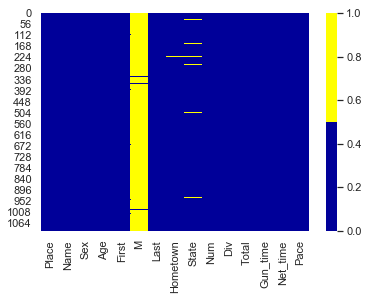

In [133]:
# Identifying Null values using heatmap
cols = female_new.columns[:15] # first 15 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(female_new[cols].isnull(), cmap=sns.color_palette(colours))

# Majority of the Null values are in Middle name column along with few among Hometown and State

### 7.2. Descriptive Statistics

In [134]:
female_new.describe()

Place          Age          Num          Div        Total  \
count  1103.000000  1103.000000  1103.000000  1103.000000  1103.000000   
mean    552.239347    36.934723  1740.047144    76.829556   152.659112   
std     318.918386    10.499559   881.039268    58.888464    67.618900   
min       1.000000    -1.000000     2.000000     1.000000     3.000000   
25%     276.500000    30.000000   983.000000    26.500000   110.000000   
50%     552.000000    37.000000  1762.000000    66.000000   173.000000   
75%     827.500000    43.000000  2495.500000   115.000000   173.000000   
max    1105.000000    74.000000  3371.000000   247.000000   247.000000   

                     Gun_time                Net_time                    Pace  \
count                    1103                    1103                    1103   
mean   0 days 01:01:42.187669  0 days 00:58:27.336355  0 days 00:09:06.578422   
std    0 days 00:10:52.526887  0 days 00:09:53.812541  0 days 00:01:41.940976   
min           0 days 00:32:59         0 days 00:32:58         0 days 00:01:03   
25%    0 days 00:54:56.500000  0 days 00:52:13.500000         0 days 00:08:18   
50%           0 days 01:01:20         0 days 00:57:49         0 days 00:09:11   
75%           0 days 01:07:32  0 days 01:03:36.500000         0 days 00:10:07   
max           0 days 01:50:31         0 days 01:46:49         0 days 00:12:58   

                   Difference  
count                    1103  
mean   0 days 00:03:14.851314  
std    0 days 00:01:28.816822  
min           0 days 00:00:00  
25%           0 days 00:03:01  
50%           0 days 00:03:29  
75%    0 days 00:03:58.500000  
max           0 days 00:09:20

### 7.3. Calculating Mean, Median and Mode

In [135]:
print('Mean Age for females:', female_new['Age'].mean())
print('Median Age for females:', female_new['Age'].median())
print('Mode for Age in females', female_new['Age'].mode())

Mean Age for females: 36.93472348141432
Median Age for females: 37.0
Mode for Age in females 0    36
dtype: int64


In [136]:
print('Mean Net_time for females:', female_new['Net_time'].mean())
print('Median Net_time for females:', female_new['Net_time'].median())
print('Mode for Net_time in females', female_new['Net_time'].mode())

Mean Net_time for females: 0 days 00:58:27.336355
Median Net_time for females: 0 days 00:57:49
Mode for Net_time in females 0   00:48:06
1   00:51:35
2   00:52:59
3   00:53:29
4   00:59:00
dtype: timedelta64[ns]


In [137]:
print('Mean Pace for females:', female_new['Pace'].mean())
print('Median Pace for females:', female_new['Pace'].median())
print('Mode for pace in females', female_new['Pace'].mode())

Mean Pace for females: 0 days 00:09:06.578422
Median Pace for females: 0 days 00:09:11
Mode for pace in females 0   00:08:58
dtype: timedelta64[ns]


In [138]:
print('Mean Gun_time for females:', female_new['Gun_time'].mean())
print('Median Gun_time for females:', female_new['Gun_time'].median())
print('Mode for Gun_time in females', female_new['Gun_time'].mode())

Mean Gun_time for females: 0 days 01:01:42.187669
Median Gun_time for females: 0 days 01:01:20
Mode for Gun_time in females 0   01:01:47
1   01:02:40
dtype: timedelta64[ns]


### 7.4. Group Values - Females

In [139]:
# Analyzing number of runners by state
female_new.groupby(["State"]).describe()

Age                                                     Difference  \
       count       mean        std   min   25%   50%   75%   max      count   
State                                                                         
DC      49.0  34.428571  10.614456  22.0  27.0  32.0  38.0  74.0         49   
FL       1.0  51.000000        NaN  51.0  51.0  51.0  51.0  51.0          1   
IA       1.0  46.000000        NaN  46.0  46.0  46.0  46.0  46.0          1   
IL       1.0  32.000000        NaN  32.0  32.0  32.0  32.0  32.0          1   
MA       1.0  38.000000        NaN  38.0  38.0  38.0  38.0  38.0          1   
MD     905.0  37.521547  10.502835  -1.0  31.0  37.0  44.0  73.0        905   
NC       3.0  29.000000   5.567764  24.0  26.0  28.0  31.5  35.0          3   
NJ       1.0  24.000000        NaN  24.0  24.0  24.0  24.0  24.0          1   
NM       1.0  50.000000        NaN  50.0  50.0  50.0  50.0  50.0          1   
NY       1.0  29.000000        NaN  29.0  29.0  29.0  29.0  29.0          1   
PA       3.0  38.000000  11.532563  25.0  33.5  42.0  44.5  47.0          3   
VA     117.0  34.085470  10.197678  -1.0  27.0  34.0  40.0  70.0        117   

                               ...    Place          Total              \
                         mean  ...      75%     max  count        mean   
State                          ...                                       
DC     0 days 00:03:29.346938  ...    829.0  1105.0   49.0  153.551020   
FL            0 days 00:04:06  ...    744.0   744.0    1.0   76.000000   
IA            0 days 00:03:20  ...    999.0   999.0    1.0  110.000000   
IL            0 days 00:01:26  ...     78.0    78.0    1.0  173.000000   
MA            0 days 00:03:50  ...    476.0   476.0    1.0  247.000000   
MD     0 days 00:03:18.764640  ...    837.0  1104.0  905.0  152.788950   
NC     0 days 00:02:05.666666  ...    536.0   865.0    3.0  158.333333   
NJ            0 days 00:03:29  ...    576.0   576.0    1.0   86.000000   
NM            0 days 00:01:22  ...    816.0   816.0    1.0   76.000000   
NY            0 days 00:03:59  ...    411.0   411.0    1.0  142.000000   
PA     0 days 00:03:33.666666  ...    542.5   752.0    3.0  141.666667   
VA     0 days 00:02:50.923076  ...    806.0  1085.0  117.0  153.264957   

                                                     
             std    min    25%    50%    75%    max  
State                                                
DC     63.027792    3.0  110.0  142.0  173.0  247.0  
FL           NaN   76.0   76.0   76.0   76.0   76.0  
IA           NaN  110.0  110.0  110.0  110.0  110.0  
IL           NaN  173.0  173.0  173.0  173.0  173.0  
MA           NaN  247.0  247.0  247.0  247.0  247.0  
MD     68.860789    3.0  110.0  173.0  173.0  247.0  
NC     81.733306   86.0  114.0  142.0  194.5  247.0  
NJ           NaN   86.0   86.0   86.0   86.0   86.0  
NM           NaN   76.0   76.0   76.0   76.0   76.0  
NY           NaN  142.0  142.0  142.0  142.0  142.0  
PA     31.501323  110.0  126.0  142.0  157.5  173.0  
VA     63.692201    3.0  110.0  173.0  173.0  247.0  

[12 rows x 72 columns]

In [140]:
# Analyzing number of runners by state
female_new.groupby(["State"])[['Age']].describe()

Age                                                    
       count       mean        std   min   25%   50%   75%   max
State                                                           
DC      49.0  34.428571  10.614456  22.0  27.0  32.0  38.0  74.0
FL       1.0  51.000000        NaN  51.0  51.0  51.0  51.0  51.0
IA       1.0  46.000000        NaN  46.0  46.0  46.0  46.0  46.0
IL       1.0  32.000000        NaN  32.0  32.0  32.0  32.0  32.0
MA       1.0  38.000000        NaN  38.0  38.0  38.0  38.0  38.0
MD     905.0  37.521547  10.502835  -1.0  31.0  37.0  44.0  73.0
NC       3.0  29.000000   5.567764  24.0  26.0  28.0  31.5  35.0
NJ       1.0  24.000000        NaN  24.0  24.0  24.0  24.0  24.0
NM       1.0  50.000000        NaN  50.0  50.0  50.0  50.0  50.0
NY       1.0  29.000000        NaN  29.0  29.0  29.0  29.0  29.0
PA       3.0  38.000000  11.532563  25.0  33.5  42.0  44.5  47.0
VA     117.0  34.085470  10.197678  -1.0  27.0  34.0  40.0  70.0

In [141]:
# Analyzing runners by age
female_new.groupby(["Age"])[["Div"]].describe()

Div                                                          
    count        mean        std   min    25%    50%     75%    max
Age                                                                
-1    2.0    9.500000   7.778175   4.0   6.75    9.5   12.25   15.0
 1    1.0   10.000000        NaN  10.0  10.00   10.0   10.00   10.0
 10   2.0    8.000000   4.242641   5.0   6.50    8.0    9.50   11.0
 11   1.0   14.000000        NaN  14.0  14.00   14.0   14.00   14.0
 12   2.0    6.000000   4.242641   3.0   4.50    6.0    7.50    9.0
 13   1.0    2.000000        NaN   2.0   2.00    2.0    2.00    2.0
 14   6.0    7.833333   4.355074   1.0   6.25    7.5   11.00   13.0
 15   6.0   16.500000   5.244044  10.0  12.00   17.5   20.75   22.0
 16   4.0   23.500000   3.109126  19.0  22.75   24.5   25.25   26.0
 17   6.0   12.833333   8.352644   1.0   7.00   15.0   17.75   23.0
 18   3.0    6.666667   6.429101   2.0   3.00    4.0    9.00   14.0
 19   7.0    8.714286   4.231402   3.0   6.50    8.0   10.50   16.0
 20   2.0   46.500000  10.606602  39.0  42.75   46.5   50.25   54.0
 21   5.0   47.600000  30.729465   2.0  41.00   48.0   61.00   86.0
 22  21.0   39.952381  24.577380   1.0  23.00   38.0   58.00   84.0
 23  28.0   45.142857  25.212746   4.0  24.75   45.0   67.25   85.0
 24  30.0   43.566667  25.878607   3.0  19.00   45.5   64.75   81.0
 25  27.0   71.555556  44.497479   3.0  30.50   74.0  109.50  140.0
 26  31.0   69.612903  45.630894   1.0  28.50   68.0  109.00  142.0
 27  21.0   78.714286  34.061918  16.0  49.00   81.0  104.00  136.0
 28  35.0   67.257143  40.346545   5.0  35.50   71.0  102.50  139.0
 29  28.0   73.428571  40.442395   6.0  43.25   66.0  105.75  137.0
 30  32.0   79.312500  50.861886   4.0  40.00   77.0  125.25  165.0
 31  29.0   65.689655  52.079680   2.0  26.00   53.0  101.00  162.0
 32  39.0   89.051282  47.512297  10.0  49.00   94.0  122.50  171.0
 33  42.0  101.404762  46.905749   8.0  65.00  109.5  136.50  173.0
 34  31.0   92.774194  49.786685   1.0  60.50   81.0  132.00  172.0
 35  49.0  126.673469  73.076840   7.0  59.00  125.0  204.00  247.0
 36  55.0  106.163636  73.127935   1.0  35.50  104.0  166.50  244.0
 37  50.0  139.040000  70.162191   2.0  81.25  150.0  188.50  243.0
 38  45.0  111.288889  68.013241   3.0  58.00  102.0  175.00  231.0
 39  48.0  137.958333  68.434145  17.0  72.75  142.5  190.75  246.0
 40  37.0   92.081081  52.446999   1.0  55.00  104.0  135.00  169.0
 41  30.0   71.133333  49.892113   6.0  35.50   59.5  114.00  171.0
 42  33.0   91.242424  45.842823   9.0  59.00   91.0  128.00  170.0
 43  43.0   82.488372  51.901634   2.0  35.00   79.0  128.50  173.0
 44  30.0   98.400000  47.700647  16.0  61.50   99.5  143.50  168.0
 45  28.0   43.714286  29.486792   1.0  19.75   44.0   62.25   98.0
 46  28.0   61.142857  29.196289   5.0  40.50   65.0   87.25  101.0
 47  18.0   50.833333  32.718496   3.0  30.50   42.5   71.75  110.0
 48  18.0   61.222222  34.435883   7.0  29.50   68.5   90.00  109.0
 49  18.0   64.000000  33.427710   9.0  37.25   69.5   94.50  107.0
 50  22.0   34.727273  22.494829   1.0  17.25   32.0   53.75   67.0
 51  13.0   38.923077  21.183569   3.0  31.00   38.0   55.00   73.0
 52  16.0   45.187500  21.072000  13.0  27.25   46.5   65.75   74.0
 53  16.0   36.437500  23.392217   4.0  14.25   41.5   51.75   76.0
 54   9.0   38.888889  23.965832   6.0  20.00   33.0   58.00   75.0
 55   5.0   11.200000   7.496666   3.0   8.00    9.0   13.00   23.0
 56   5.0   13.600000   7.700649   5.0   6.00   16.0   19.00   22.0
 57   6.0   13.333333  10.893423   1.0   4.75   12.0   22.25   27.0
 58   7.0   15.714286   8.616153   2.0  10.50   18.0   20.50   28.0
 59   5.0   18.400000   6.580274  12.0  14.00   15.0   25.00   26.0
 60   2.0    2.000000   1.414214   1.0   1.50    2.0    2.50    3.0
 61   4.0   11.500000   7.141428   2.0   8.75   12.5   15.25   19.0
 62   7.0   10.285714   5.219013   4.0   6.50    9.0   14.00   18.0
 63   3.0   11.666667   5.507571   6.0   9.00   12.0   14.50  